# Introduction

## Project Overview



This project aims to **Forecasting housing prices with regression models** in USA.

## Business Problem

Homeowners are looking for ways not only to evaluate the prices of their homes, but also to keep track of it as it changes overtime. Real estate agencies are also looking for methods to evaluate property that will yield fair results and customer satisfaction. With the help of data, we can leverage data science techniques to provide **a trusted estimate of property all across the the USA**.

## Data

We'll be using the Zillow dataset.

The dataset contains:

**id** - `unique identifier for a house`

**date** - `date the house was sold`

**price** - `Sale price of the house (in dollars)`

**bedrooms** - `number of Bedrooms in a house`

**bathrooms** - `number of bathrooms in a house`

**sqft_living** - `square footage of the house`

**sqft_lot** - `square footage of the lot`

**floors** - `total floors (levels) in the house`

**waterfront** - `House which has a view to a waterfront`

**view** - `Quality of view from house`

**condition** - `How good the condition is ( Overall )`

**grade** - `overall grade given to the housing unit, based on King County grading system`

**sqft_above** - `square footage of house apart from basement`

**sqft_basement** - `square footage of the basement`

**yr_built** - `Year the house was built`


**yr_renovated** - `Year the house was renovated`

**zipcode** - `zip code in which the house is located`

**lat** - `Latitude coordinate`

**long** - `Longitude coordinate`

**sqft_living15** - `The square footage of interior housing living space for the nearest 15 neighbors`

**sqft_lot15** - `The square footage of the land lots of the nearest 15 neighbors`


## Let us import libraries and explore the dataset

### Importing Libraries

In [294]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from scipy.stats import norm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings(action= 'ignore', category= UserWarning)
import folium

#code to display all the columns without truncation
pd.set_option('display.max_columns', None)


# Data Understanding

Here we are exploring our dataset by loading it and viewing various columns and rows in it. 

We then clean the dataset by: 
                             
* Obtaining information from the dataset.
                              
* Checking for missing values.
                             
* Checking for duplicates.
                               
* Checking for the outliers.
                              
* Checking for correct data types.
                              
* Changing some column names.
                              
                              
                              
                              

We defined functions to explore our data.

### Exploring the dataset

In [295]:
# Reading the dataset
df = pd.read_csv("zillow_house_data.csv")

#Display the first few rows in the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [296]:
#Display the last few rows in the dataframe
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,Average,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [297]:
#Display of the number of rows and columns in the dataframe
df.shape  

(21597, 21)

As seen the data has:
* **21597** rows which are the number of houses sold.
* **21** columns which represent the house features.

In [298]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The features are either strings ,floats or integers.

# Checking the distribution of variables in the dataset

Checking the distribution of variables in the dataset involves examining how the different features that describe a house are distributed across the dataset.By looking at the distribution of features, we can identify any potential outliers, missing values, or unusual patterns that may need to be addressed during preprocessing. This information is crucial for building accurate machine learning models that can predict house prices.


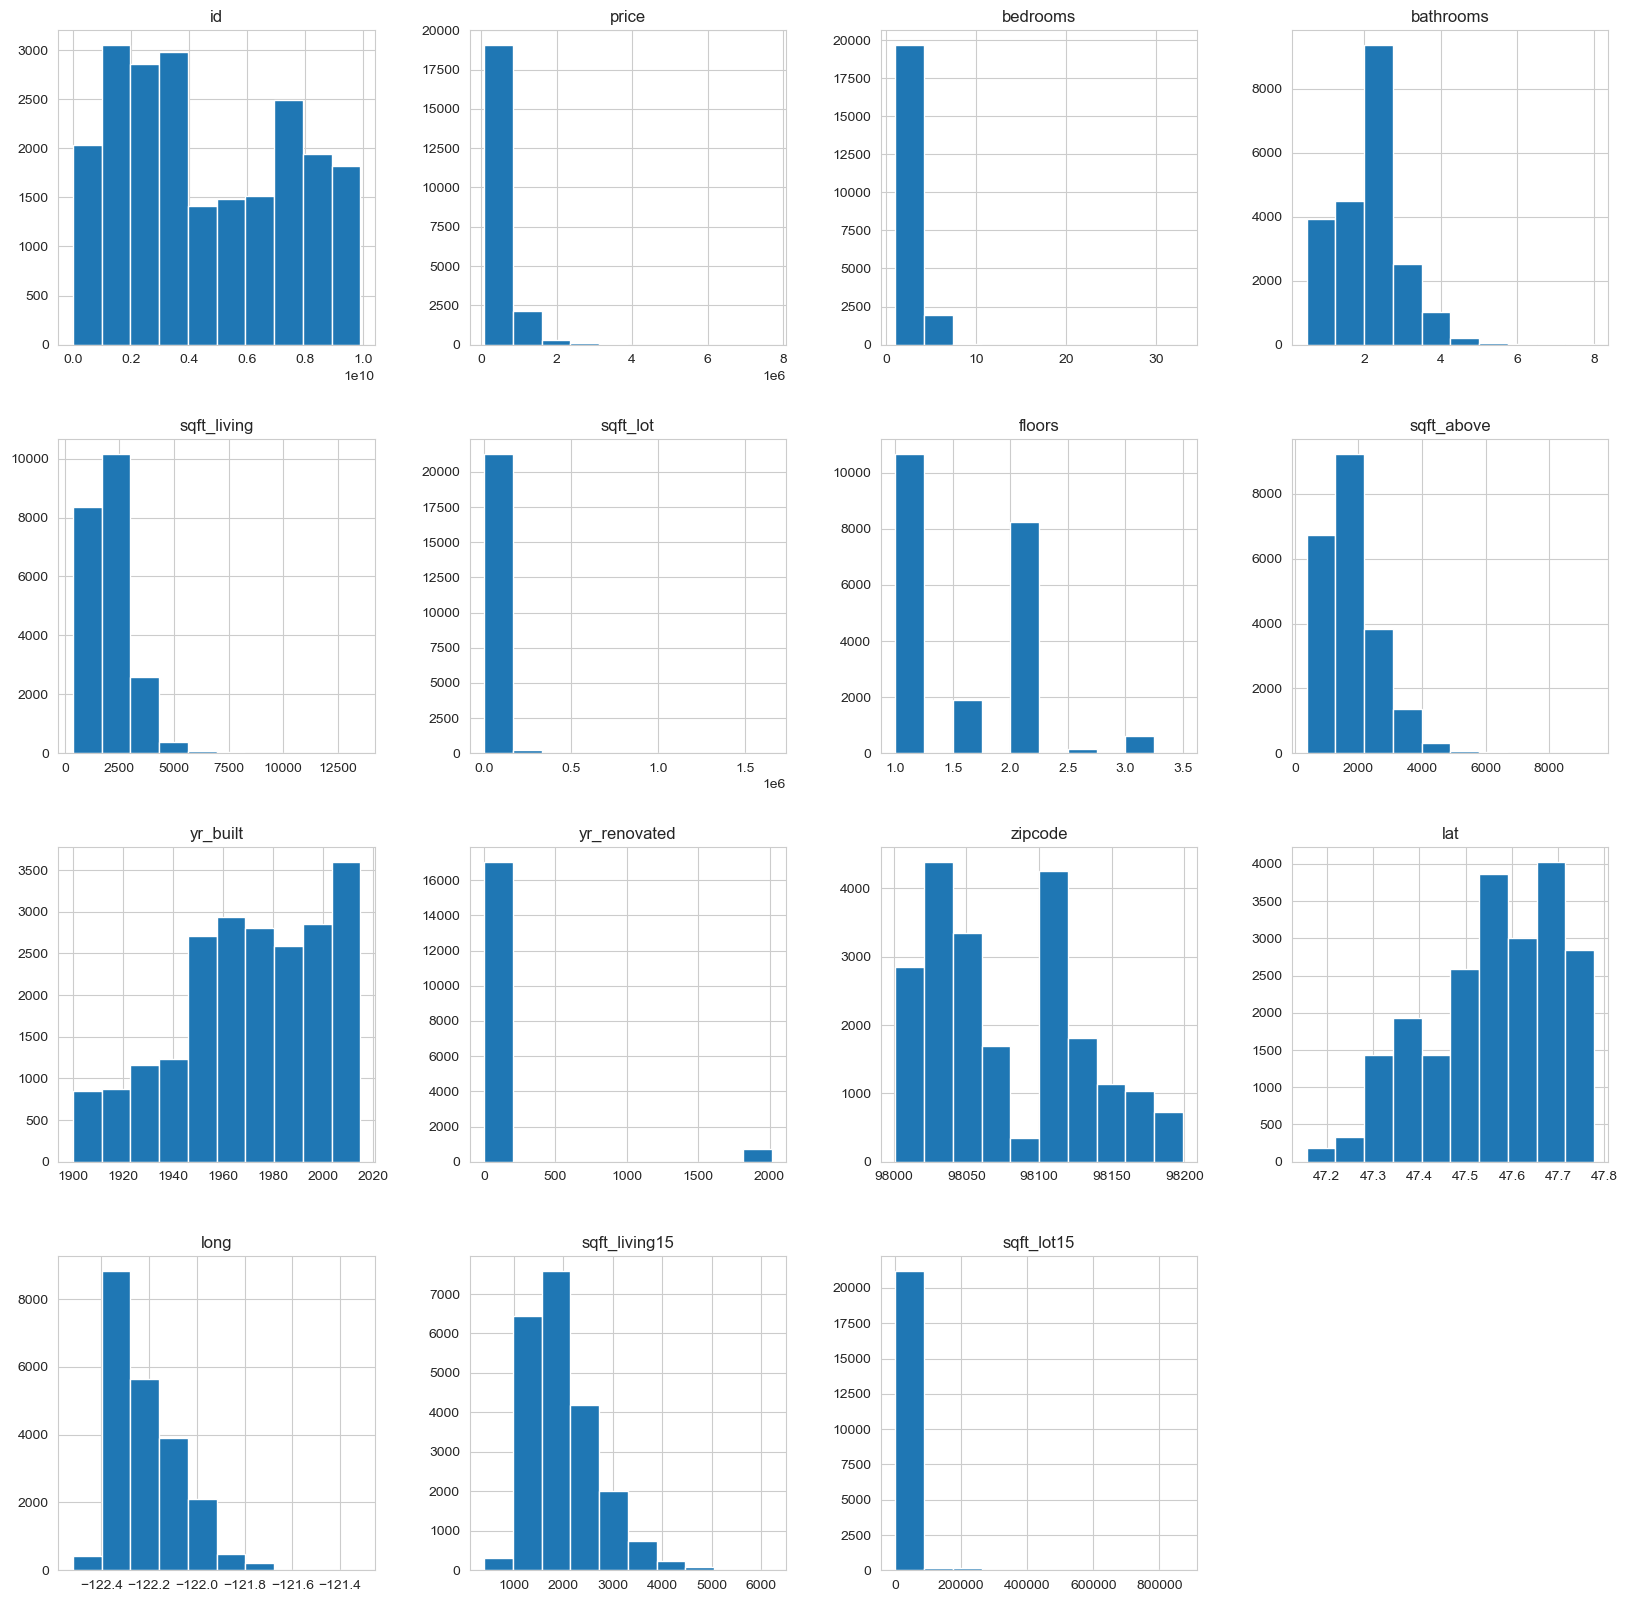

In [299]:
#plotting histograms
def histo(df):
    return df.hist(figsize=(20,20))
histo(df);


Most of the variables do not show normal distribution. As a result, some assumptions of regression analysis may not be met. 

### Here we check for the descriptive statistics of the dataset.

We first drop the `id` column which is not necessary for descriptive statistics.

In [300]:
#summary statistics of the numerical columns in a dataframe
def data_description(df):
    return (df.drop('id', axis = 1)).describe()
data_description(df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From our descriptive statistics we can see a potential for outliers such as the 33 bedrooms.

# Data Cleaning

### Checking  data type encoding

We noticed that `sqft_basement` was encoded as an object, even though it's cleary numerical

In [301]:
list(df['sqft_basement'][:10])

['0.0', '400.0', '0.0', '910.0', '0.0', '1530.0', '?', '0.0', '730.0', '0.0']

We also notice an invalid entry `?`.

The following function converts the data type and deals with the invalid entry

In [302]:
def clean_basement(col):
    df[col] = df[col].replace('?', '0.0')
    df[col] = df[col].astype(float)
    print(list(df['sqft_basement'][:10]))
clean_basement('sqft_basement')

[0.0, 400.0, 0.0, 910.0, 0.0, 1530.0, 0.0, 0.0, 730.0, 0.0]


The column is now encoded properly.

## Renaming Columns

This will rename the `date` column to `date_sold`.

In [303]:
def renaming_columns(df,cols_old,cols_new):
    return df.rename(columns={cols_old: cols_new
    }, inplace=True)
renaming_columns(df,'date','date_sold')


## Checking for Missing Values

Missing data can cause issues with statistical analyses; therefore, it's important to handle them appropriately.Let's check if we have any.

In [304]:
#The following function returns all columns with missing values alongside the quantity and percentage

def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (round((data.isnull().sum() / len(data)*100),2)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})
    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data

,Missing Values,Percentage(%)
yr_renovated,3842,17.79
waterfront,2376,11.00
view,63,0.29


There are missing values in 3 columns. Since `yr_renovated` and `waterfront` have too many missing values, it would be best to replace them. However, since `view` has few missing values, we will drop only the rows that were affected.

**Replacing missing values in "yr_renovated" column**

In [305]:
df['yr_renovated'].value_counts() 

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

Replacing missing values with 0.0 would be better than dropping the entire column

In [306]:
df['yr_renovated'].fillna(value= 0.0, inplace=True)

**Replacing missing values in "view" column**

In [307]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [308]:
df['view'].fillna(value='NONE', inplace=True)

**Replacing missing values in "waterfront" column**

In [309]:
#Count of the unique values in the waterfront column
df.waterfront.value_counts(normalize=True)

NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64

99.2% of homes are not considered as waterfront properties

In [310]:
# replacing the missing values using their probability
def replace_missing_val(df,cols):
    df[cols] = df[cols].fillna(value=(np.random.choice(['YES', 'NO'], p=[0.01, 0.99])))
    # checking if the missing values have been replaced
    print('There are now', df[cols].isnull().sum(), 'missing values in waterfront column')
replace_missing_val(df,'waterfront')

There are now 0 missing values in waterfront column


## Checking for duplicates

Many columns with categorical data will contain duplicates. However the `id` column must only have a single unique identifier per entry. Let's verify this.

In [311]:
#finding total number of duplicates
# Duplicated entries
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates
        duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")
identify_duplicates(df)

The Data has no duplicates


In [312]:
# checking for duplicates in unique columns
def unique_column_duplicates(df, column):
    df.id.duplicated().sum()
    df = pd.DataFrame(df)
# count number of duplicated values in the 'id' column
num_duplicates = df['id'].duplicated().sum()
print('Number of duplicates in "id" column:', num_duplicates)

Number of duplicates in "id" column: 177


In [313]:
#Lets see the rows that have duplicates as per the id column
pd.concat( g for _,g in df.groupby("id") if len(g) > 1).head()

,id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NO,NONE,Average,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,NO,NONE,Average,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,NO,NONE,Average,6 Low Average,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,NO,NONE,Average,6 Low Average,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,NO,NONE,Good,7 Average,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956


Here we notice that that there are duplicate ids which appear to be houses that were bought more than once by different clients.

## Checking for outliers

In [314]:
#summary statistics of the numerical columns in a dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


That house with 33 bedrooms is definitely odd.

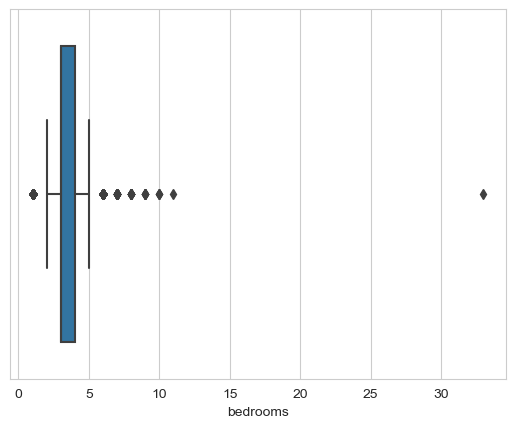

In [315]:
# we can also use a box plot to identify outliers
def create_boxplot(dataframe, x_col):
    sns.boxplot(data=dataframe, x=x_col)
create_boxplot(df, "bedrooms");

In [316]:
#let's count the number of occurrences of each unique value in the 'bedrooms' column 
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [317]:
#Let's only show the row where the value in the 'bedrooms' column is equal to 33.
df[df['bedrooms'] == 33]

,id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


### Dropping Outliers

In [318]:
# Let's drop the 33 bedroom row
df.drop(index=15856, inplace=True)

#And verify that it is gone
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [319]:
#Checking for outliers in bathrooms
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [320]:
df.isnull().sum()

id               0
date_sold        0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Our data is now clean**

#  Exploratory Data Analysis

Let's explore the data in order to answer some interesting questions.

## How does price vary with the season?

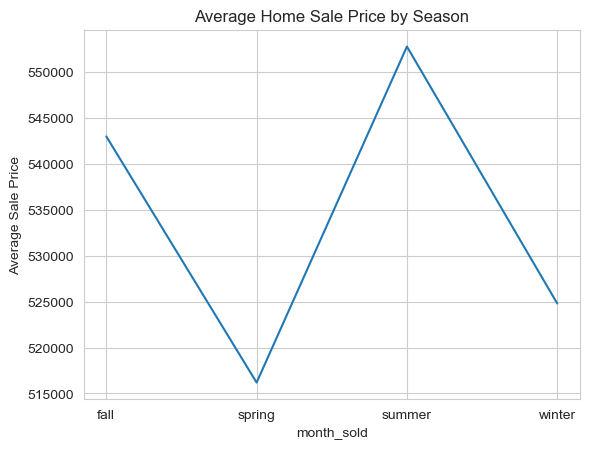

In [321]:
#Extracting an individual month column
df['month_sold'] = pd.DatetimeIndex(df['date_sold']).month

# set columns for seasons sold
df.loc[(df['month_sold'] >= 1) & (df['month_sold'] <= 3), 'season'] = 'spring'
df.loc[(df['month_sold'] >= 3) & (df['month_sold'] <= 6), 'season'] = 'summer'
df.loc[(df['month_sold'] >= 6) & (df['month_sold'] <= 9), 'season'] = 'fall'
df.loc[(df['month_sold'] >= 9) & (df['month_sold'] == 12), 'season'] = 'winter'
#Plotting a line graph
plt.plot(df.groupby('season')['price'].mean().round(2))
plt.title('Average Home Sale Price by Season')
plt.ylabel('Average Sale Price')
plt.xlabel('month_sold');

Here we see that prices start rising from spring to summer and start dropping during summer to spring

## Does the age of the house affect it's price?

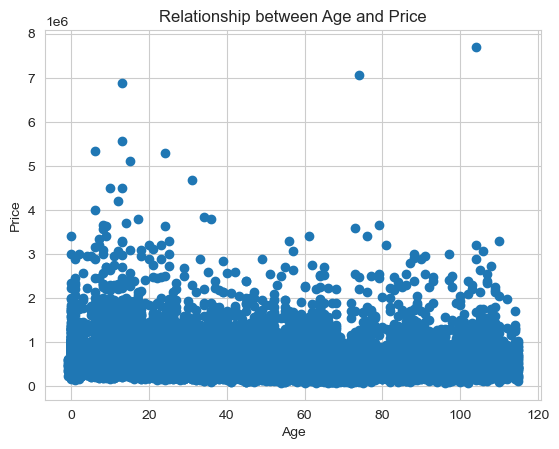

In [322]:
#Plotting a Scatter plot for age and price
year_sold = pd.DatetimeIndex(df['date_sold']).year
age =year_sold-df['yr_built']
df['age'] = age
plt.scatter(age, df['price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Relationship between Age and Price');

According to the analysis, newer houses tend to be more expensive than older houses, all other things being equal. This could be because newer houses are typically in better condition and have more modern amenities than older houses.

## How does view affect price?

In [323]:
#Extracting value counts
df['view'].value_counts()

NONE         19484
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

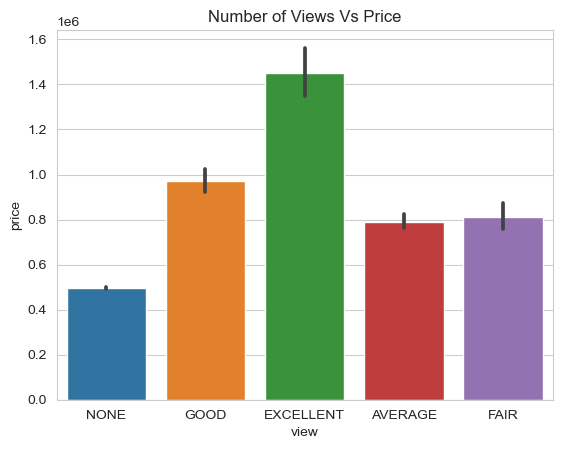

In [324]:
#Plotting a barplot of 'view' against 'price'
sns.barplot(x=df['view'], y=df['price']).set(title='Number of Views Vs Price');

Houses with better views have higher prices.

## How does condition affect price?

We would also expect the condition of the house to affect its price. Let's verify this

In [325]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

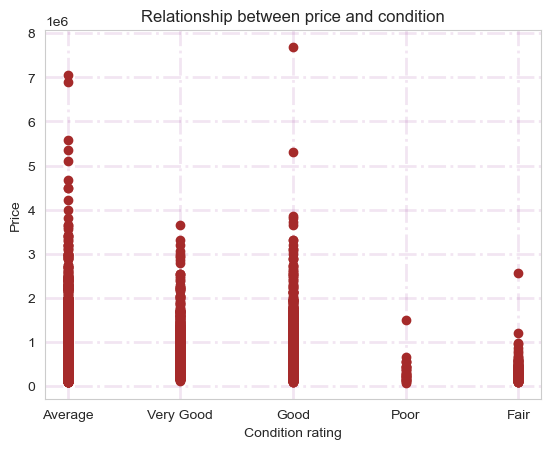

In [326]:
plt.scatter(df['condition'], df['price'], color='brown')
plt.title('Relationship between price and condition')
plt.xlabel('Condition rating')
plt.ylabel('Price')
plt.grid(color='purple',
         alpha=0.1,
         linestyle='-.',
         linewidth=2);


Surprisingly, houses with average conditions tend to be sold at higher prices as compared to the houses with very good conditions.

# Which factors are most correlated with price?

C:\Users\achyu\AppData\Local\Temp\ipykernel_4328\3509754449.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\achyu\AppData\Local\Temp\ipykernel_4328\3509754449.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidth= 1)


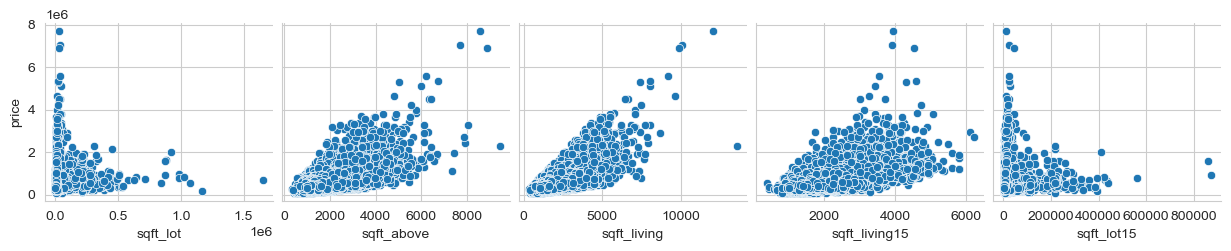

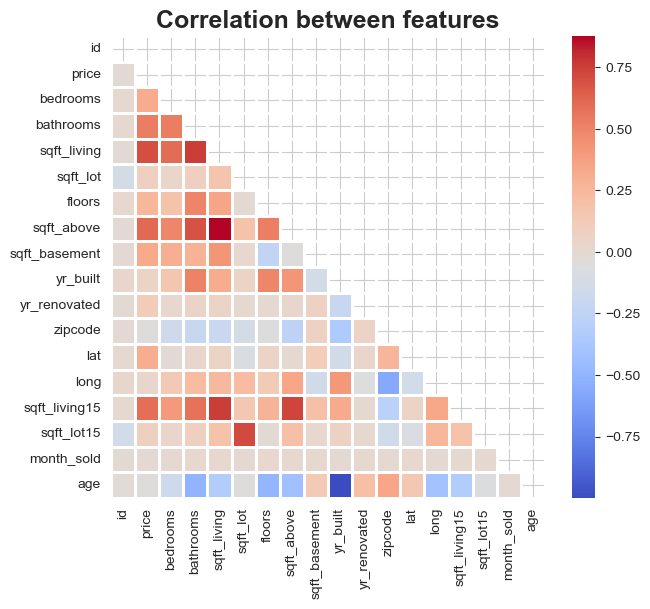

C:\Users\achyu\AppData\Local\Temp\ipykernel_4328\3509754449.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax= sns.heatmap(df.corr(), annot=True, cmap="viridis")


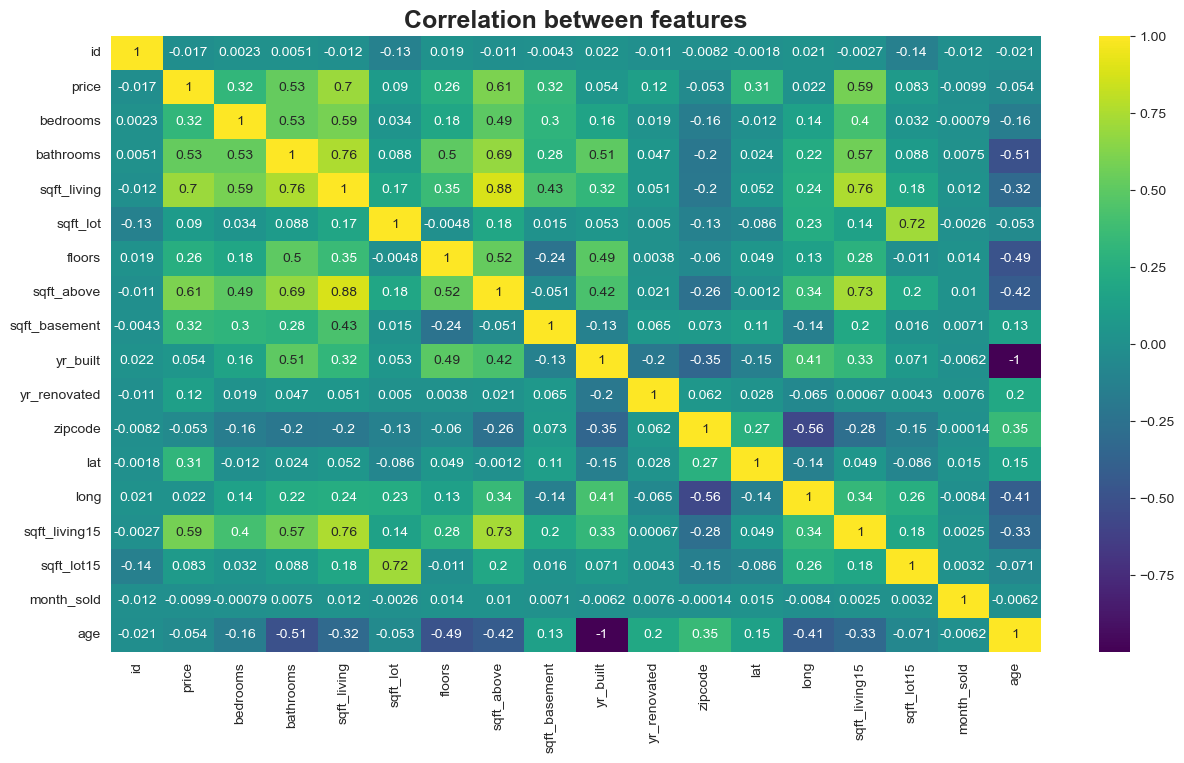

In [327]:
# Lets create a heatmap to check for correlations
sns.pairplot(data=df, x_vars=['sqft_lot','sqft_above','sqft_living','sqft_living15','sqft_lot15'], y_vars=["price"]);

corr = df.corr()
plt.figure(figsize=(7,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidth= 1)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

fig, ax = plt.subplots(figsize=(15,8))
ax= sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation between features",weight='bold',fontsize=18);

From the heat map, the most correlated factors with `price` are `sqft_living`, `sqft_above`, `sqft_living15` and `bathrooms`.

We can see that `sqft_lot` size is not well correlated to `price` but the data for living space is reasonable. Visually the best feature to use looks like `sqft_living` as we expected because it has a stronger linear relationship with p`rice`.

## Multicollinearity

There could be a pretty high level of multi-collinearity between some of these variables. Let's make a table to see things more clearly

In [328]:
#The following function displays columns that are highly correlated with one other

def check_multiCorr(df):
    num_cols = df.select_dtypes(include=['float64','int64'])
    ncc = list(num_cols.columns)
    for col1 in ncc:
        for col2 in ncc:
            if col1 != col2:
                correlation = df[col1].corr(df[col2])
                if correlation > 0.75:
                    print(col1, " is correlated with ", col2, "by", correlation)
                    ncc.remove(col1)
check_multiCorr(df)

bathrooms  is correlated with  sqft_living by 0.7557549147361163
sqft_above  is correlated with  sqft_living by 0.8764484603504941
sqft_living15  is correlated with  sqft_living by 0.7563997641757078


## Categorical columns

Let's divide our dataframe into two. One for categorical features and the other for numerical features

In [329]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_cat = df.select_dtypes(include=['object'])

### Binning the `view` column. 

The following code bins the `view` column into three categories

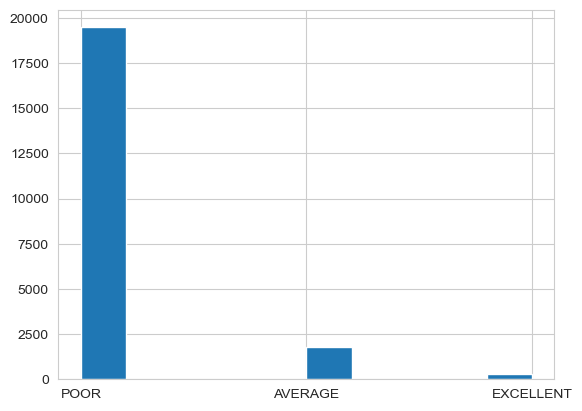

In [330]:
df['view'] = df['view'].replace(regex='GOOD', value="AVERAGE")
df['view'] = df['view'].replace(regex='NONE', value="POOR")
df['view'] = df['view'].replace(regex='FAIR', value="AVERAGE")
df['view'].hist();

### Binning the `yr_renovated` column

The following function bins the `yr_renovated` column into two categories

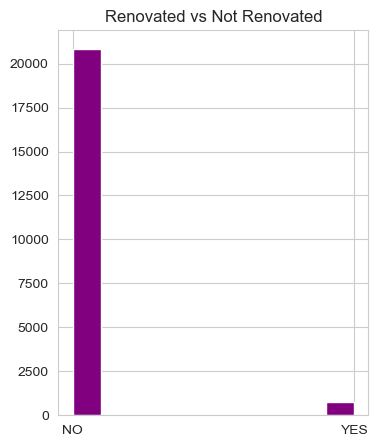

In [331]:
def bin_column(data, col):
    list_years= list(df[col].unique())
    for x in list_years:
        if x !=0:
            df[col] = df[col].replace(x ,"YES")
        else:
            df[col] = df['yr_renovated'].replace(x,"NO")

bin_column(df, 'yr_renovated')
fig, ax = plt.subplots(figsize=(4,5))
ax.hist(df['yr_renovated'], color='purple');
ax.set_title("Renovated vs Not Renovated");

In [332]:
df_cat.head()

,date_sold,waterfront,view,condition,grade,season
0,10/13/2014,NO,NONE,Average,7 Average,NaN
1,12/9/2014,NO,NONE,Average,7 Average,winter
2,2/25/2015,NO,NONE,Average,6 Low Average,spring
3,12/9/2014,NO,NONE,Very Good,7 Average,winter
4,2/18/2015,NO,NONE,Average,8 Good,spring


# Modeling

We will use Linear Regression ,Decision Tree, KNN, Random Forest Regression, Ridge Regression, Lasso Regression, and XGBoost Regression for our modelling and select which best suits our data set.

## Train-Test Split

#### Splitting the data into Train and Test chunks for better evaluation

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Establishing multiple evaluation functions to enhance convenience

In [334]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

## Machine Learning Models

In [335]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

### Linear Regression

In [336]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 168826.95509923415
MSE: 65185818516.93465
RMSE: 255315.1356988744
R2 Score: 0.4994034658326505
------------------------------
RMSE Cross-Validation: 257689.58087194673


C:\Users\achyu\AppData\Local\Temp\ipykernel_4328\1297718856.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


### Ridge Regression

In [337]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 168826.60557282393
MSE: 65185562261.50544
RMSE: 255314.63385694413
R2 Score: 0.49940543375424207
------------------------------
RMSE Cross-Validation: 257689.51956076143


C:\Users\achyu\AppData\Local\Temp\ipykernel_4328\2610199966.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


### Lasso Regression

In [338]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 168826.7392325604
MSE: 65185737151.21127
RMSE: 255314.97635511175
R2 Score: 0.49940409068327063
------------------------------
RMSE Cross-Validation: 257689.54636797262


C:\Users\achyu\AppData\Local\Temp\ipykernel_4328\500153720.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


### Random Forest Regressor

In [339]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 159514.81383475527
MSE: 62146803995.02415
RMSE: 249292.60718084712
R2 Score: 0.5227416730004782
------------------------------
RMSE Cross-Validation: 247600.34588183803


C:\Users\achyu\AppData\Local\Temp\ipykernel_4328\963445686.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


### XG Boost Regressor

In [341]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 153913.37405237267
MSE: 63215152224.8582
RMSE: 251426.23615060182
R2 Score: 0.5145372593211468
------------------------------
RMSE Cross-Validation: 244244.36949240445


C:\Users\achyu\AppData\Local\Temp\ipykernel_4328\2603747099.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


### Support Vector Machines

In [342]:
from sklearn.svm import SVR
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 164818.0298561094
MSE: 78277475481.65025
RMSE: 279781.1206669425
R2 Score: 0.39886567629270786
------------------------------
RMSE Cross-Validation: 285141.669698903


C:\Users\achyu\AppData\Local\Temp\ipykernel_4328\2532275571.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


### Model Comparison

#### The less the Root Mean Squared Error (RMSE), The better the model is

In [343]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
4,XGBRegressor,153913.374052,6.321515e+10,251426.236151,0.514537,244244.369492
3,RandomForestRegressor,159514.813835,6.214680e+10,249292.607181,0.522742,247600.345882
1,Ridge,168826.605573,6.518556e+10,255314.633857,0.499405,257689.519561
2,Lasso,168826.739233,6.518574e+10,255314.976355,0.499404,257689.546368
0,LinearRegression,168826.955099,6.518582e+10,255315.135699,0.499403,257689.580872
5,SVR,164818.029856,7.827748e+10,279781.120667,0.398866,285141.669699


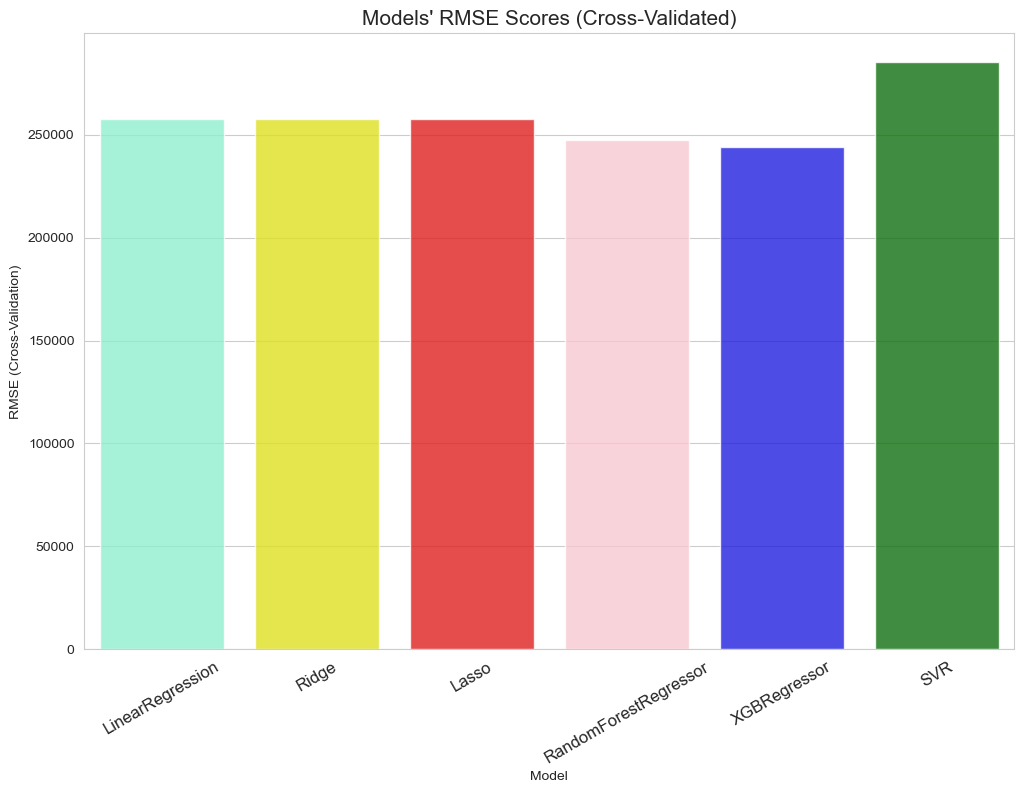

In [344]:
plt.figure(figsize=(12,8))
colors = ['aquamarine', 'yellow', 'red', 'pink', 'blue', 'green']
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"], palette=colors, alpha = 0.8)

plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

# End of the Project